# Lab N
### Morphology

Skimage morphology operators' documentation:
https://scikit-image.org/docs/dev/api/skimage.morphology.html

In [2]:
from commonfunctions import *
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.morphology import binary_erosion, binary_dilation, binary_closing,skeletonize, thin
from skimage.measure import find_contours
from skimage.draw import rectangle

# Show the figures / plots inside the notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
'''
1) Erosion / Dilation:
    - Load "coins.jpg" from the img folder
    - Convert the image to binary
    - Write 2 functions each applying 1 of the erosion/dilation algorithms (with adjustable square window size) manually to the binary image
    - Use Skimage's "binary_erosion" & "binary_dilation" & show the results
'''


'\n1) Erosion / Dilation:\n    - Load "coins.jpg" from the img folder\n    - Convert the image to binary\n    - Write 2 functions each applying 1 of the erosion/dilation algorithms (with adjustable square window size) manually to the binary image\n    - Use Skimage\'s "binary_erosion" & "binary_dilation" & show the results\n'

In [4]:
'''
2) Case Study: Credit Card Number Extraction
    - Load "card.jpg" from the img folder
    - Convert the image to binary by brightness thresholding maintaining the card number details for extraction
    - Use your erosion/dilation functions, or Skimage's functions only if you didn't implement them, to apply closing
        Note: The goal of this step is to join the card number into 4 sets of connected pixels
    - Use Skimage's "find_contours" to get the bounding boxes for the credit card's numbers by filtering on aspect ratio (between 2.5 & 3.5)
        Note: When using "find_contours(img, 0.8)" the o/p is a list of contours each having:
                - contour[:,0] being the Y values of the contour perimeter points
                - contour[:,1] being the X values of the contour perimeter points
'''

#When provided with the correct format of the list of bounding_boxes, this section will set all pixels inside boxes in img_with_boxes
for box in bounding_boxes:
    [Xmin, Xmax, Ymin, Ymax] = box
    rr, cc = rectangle(start = (Ymin,Xmin), end = (Ymax,Xmax), shape=img_gray.shape)
    img_with_boxes[rr, cc] = 1 #set color white

NameError: name 'bounding_boxes' is not defined

In [ ]:
'''
3) Skeletonization:
    - Load "horse.jpg" from the img folder 
    - Use a binary threshold of 0.9 to remove invisible noise in the background
    - Use Skimage's "skeletonize(image)" to acquire the image's skeleton & show it
    - Use Skimage's "thin(image, max_iter)" with values of max_iter 5/10/15/20 & show it
'''


In [14]:
horsePic = rgb2gray(io.imread('./img/horse.jpg'))

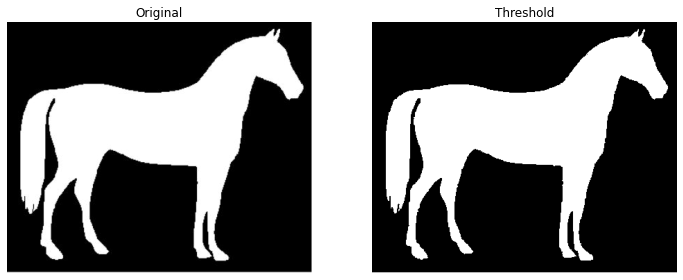

In [23]:
# print(horsePic)
horsePicThreshold = np.where(horsePic > 0.9, 1, 0)
show_images([horsePic,horsePicThreshold],["Original", "Threshold"])
# print(horsePicThreshold)

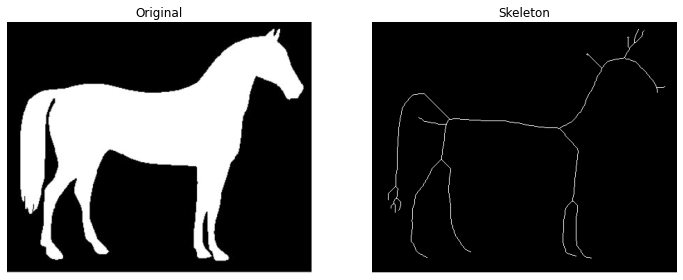

In [24]:
horseSkeleton = skeletonize(horsePicThreshold)
show_images([horsePic,horseSkeleton],["Original", "Skeleton"])

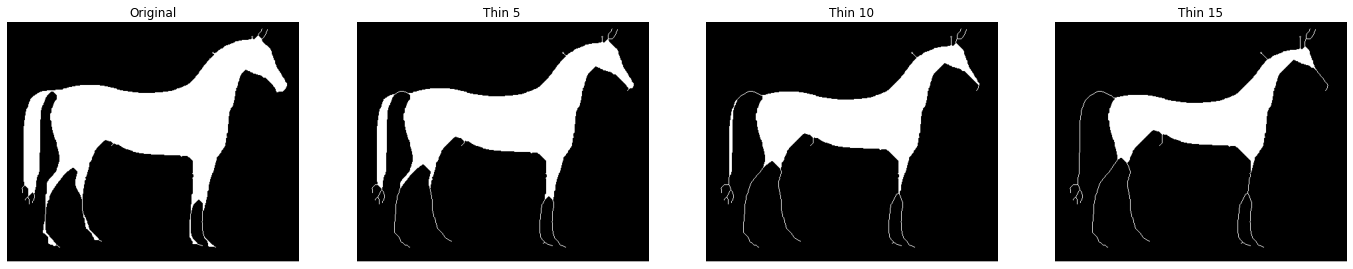

In [25]:
horsePicThin5 = thin(horsePicThreshold, 5)
horsePicThin10 =thin(horsePicThreshold, 10)
horsePicThin15 =thin(horsePicThreshold, 15)
horsePicThin20 =thin(horsePicThreshold, 20)
show_images([horsePicThin5,horsePicThin10,horsePicThin15,horsePicThin20],["Original", "Thin 5","Thin 10","Thin 15","Thin 20"])